In [1]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import statistics
from scipy import stats

In C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor 

In [2]:
# B01 is a control experiments: HelaH201, transient stimulation with 100uM NE and 25uM FSK
data = pd.read_csv(Path('C:\\Users\\thinkBookUser\\Desktop\\Data_Analyzed\\2021\\03\\16\\results\\all_results.csv'))
fit = pd.read_csv(Path('C:\\Users\\thinkBookUser\\Desktop\\Data_Analyzed\\2021\\03\\16\\results\\B01_fit.csv'))
tau = pd.read_csv(Path('C:\\Users\\thinkBookUser\\Desktop\\Data_Analyzed\\2021\\03\\16\\results\\B01_tau.csv'),'\t',header=None)
data = data.replace([np.inf, -np.inf], np.nan)
fit = fit.replace([np.inf, -np.inf], np.nan)
tau = tau.replace([np.inf, -np.inf], np.nan)
frameinterval = 5

Mean start_tau for 100 uM Norepinephrine and 25 uM Forskolin 2.34 ns +/- 0.05 ns (SD), N = 154 datapoints, with SEM of 0.0041 and with the maximum value of 2.53


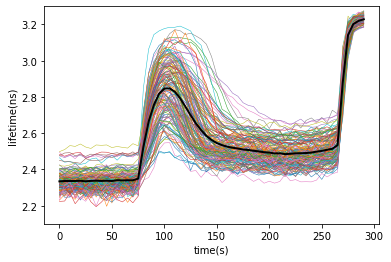

In [3]:
fig = plt.figure()
title = '100 uM Norepinephrine and 25 uM Forskolin'
fit_errorfree = fit[fit['error']==0]
tau_error_free = tau[fit['error']==0]
xax = np.arange(0,frameinterval*len(tau.columns),frameinterval)
minFSKvalue = 3.18
bigger = tau_error_free[tau_error_free.iloc[:,-1] > minFSKvalue]
for i in range(len(bigger)):
    plt.plot(xax,bigger.iloc[i,:],linewidth=0.5)
meantrace = tau_error_free.to_numpy()
meantrace = np.mean(meantrace,axis=0)
plt.plot(xax,meantrace, 'k-',linewidth=2)
plt.xlabel('time(s)')
plt.ylabel('lifetime(ns)')
datapoints=len(tau_error_free)
plt.ylim([2.1,3.3])

control_starttau = (fit_errorfree['start tau(ns)'])
print("Mean start_tau for",title, round(control_starttau.mean(), 2), "ns +/-", round(statistics.stdev(control_starttau), 2), "ns (SD), N =", control_starttau.size, "datapoints,", 'with SEM of', round(stats.sem(control_starttau), 4), 'and with the maximum value of', round(control_starttau.max(), 2))
#fig.savefig(Path('C:\\Users\\thinkBookUser\\Desktop', 'Meantrace and all traces Fig1_NE_vol2.svg'),dpi=600)

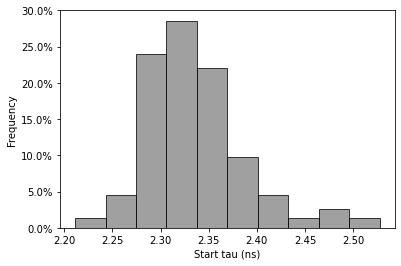

In [4]:
fig = plt.figure()
data = fit_errorfree['start tau(ns)']
plt.hist(data, bins=10, weights=np.ones(len(data))/len(data), facecolor='gray', edgecolor='k', alpha=0.75)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Start tau (ns)')
plt.ylabel('Frequency')
plt.show()
#fig.savefig(Path('C:\\Users\\thinkBookUser\\Desktop', 'Meantrace and all traces Fig1_NE_vol2_hist.svg'),dpi=600)